In [8]:
import json 
import matplotlib
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import numpy as np 
import sklearn 
import statistics
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline


In [36]:
full_data = pd.read_csv('../../data/raw-data/filtered_everything.csv', index_col=0)
combined_test = pd.read_csv('../../data/splitted-data/everything/nbins-10/test_set.csv', index_col=0)
m2575 = pd.read_csv('../../data/raw-data/unprocessed/mixed-25-75.csv', index_col=0)
m2575_test = pd.read_csv('../../data/splitted-data/mixed2575/nbins-10/test_set.csv', index_col=0)
m5050_test = pd.read_csv('../../data/splitted-data/mixed5050/nbins-10/test_set.csv', index_col=0)
optimal = pd.read_csv('../../data/raw-data/opt_22_raw.csv', index_col=0)


In [37]:
ranked_cof = full_data.sort_values(by='COF').head(500)
ranked_f0 = full_data.sort_values(by='intercept').head(500)

In [38]:
print(f'COF: ({ranked_cof["COF"].min()} - {ranked_cof["COF"].max()})')
print(f'intercept: ({ranked_f0["intercept"].min()} - {ranked_f0["intercept"].max()})')

COF: (0.0737549238333333 - 0.11391470845)
intercept: (0.0074703459 - 0.5406461831333335)


In [29]:
print(f'COF: ({optimal["COF"].min()} - {optimal["COF"].max()})')
print(f'intercept: ({optimal["intercept"].min()} - {optimal["intercept"].max()})')

COF: (0.0897547562333333 - 0.1138129731)
intercept: (0.1943681397666666 - 0.5375470229)


In [3]:
oresults_path = '../predicted-results/original/nbins-10'
mresults_path = '../predicted-results/mixed5050/nbins-10'
eresults_path = '../predicted-results/everything/nbins-10'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050/nbins-10'
emodels_path = '../models/everything/nbins-10'

test_sets = ['5050', '2575', 'everything']

mpoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 'all']
epoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 'all']


In [4]:
# Consider 5050 models and everything models at the 2500 mark 
m5models = dict()
emodels = dict()
omodels = dict()
# 5050 model
for tset in ['5050', '2575', 'everything']:
    m5models[tset] = dict()
    emodels[tset] = dict()
    omodels[tset] = dict()
    
    '''First load the original models'''
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        omodels[tset][target] = {
#                                 'model': model,
                                 'features': features,
                                 'data': data,
                                 'n_train': len(model.oob_prediction_),
                                 'r_square': data[target]['r_square']}
        
    '''Then load the mixed5050 models'''
    for target in ['COF', 'intercept']:
        m5models[tset][target] = dict()
        for point in mpoints:
            m5models[tset][target][point] = dict()
            for i in range(5):
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{mresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                
                m5models[tset][target][point][f'set_{i}'] = dict()
                m5models[tset][target][point][f'set_{i}'] = {
#                  'model': model,
                  'features': features,
                  'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']}

                    
    '''Finally load the combined models'''
    for target in ['COF', 'intercept']:
        emodels[tset][target] = dict()
        for point in epoints:
            emodels[tset][target][point] = dict()
            for i in range(5):
                with open(f'{emodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{emodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{eresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                    
                emodels[tset][target][point][f'set_{i}'] = dict()
                emodels[tset][target][point][f'set_{i}'] = {
#                  'model': model,
                  'features': features,
                  'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']}
 


In [5]:
doi = {'omodels': dict(), 
       'mmodels': dict(), 
       'emodels': dict()}

for tset in ['5050', '2575', 'everything']:
    doi['omodels'][f'on_{tset}'] = dict()
    for target in ['COF', 'intercept']:
        doi['omodels'][f'on_{tset}'][target] = dict()
        omoi = omodels[tset][target]
        odoi = dict() 
        odoi['terminal_group_1'] = list()
        odoi['terminal_group_2'] = list()
        odoi['terminal_group_3'] = list()
        odoi['frac-1'] = list() 
        odoi['frac-2'] = list()
        odoi[f'predicted-{target}'] = list()
        odoi[f'simulated-{target}'] = list()
        for j in omoi['data'][target]:
            if j != 'r_square':
                odoi['terminal_group_1'].append(omoi['data'][target][j]['tg-1'])
                odoi['terminal_group_2'].append(omoi['data'][target][j]['tg-2'])
                odoi['terminal_group_3'].append(omoi['data'][target][j]['tg-3'])
                odoi['frac-1'].append(omoi['data'][target][j]['frac-1'])
                odoi['frac-2'].append(omoi['data'][target][j]['frac-2'])
                odoi[f'predicted-{target}'].append(omoi['data'][target][j][f'predicted-{target}'])
                odoi[f'simulated-{target}'].append(omoi['data'][target][j][f'simulated-{target}'])

        doi['omodels'][f'on_{tset}'][target] = pd.DataFrame.from_dict(odoi)            

    for point in mpoints: 
        doi['mmodels'][f'{point}_on_{tset}'] = dict() 
        for target in ['COF', 'intercept']:
            doi['mmodels'][f'{point}_on_{tset}'][target] = dict()
            for i in range(5):
                doi['mmodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = dict()
                mmoi = m5models[tset][target][point][f'set_{i}']
                mdoi = dict() 
                mdoi['terminal_group_1'] = list()
                mdoi['terminal_group_2'] = list()
                mdoi['terminal_group_3'] = list()
                mdoi['frac-1'] = list() 
                mdoi['frac-2'] = list()
                mdoi[f'predicted-{target}'] = list()
                mdoi[f'simulated-{target}'] = list()
                for j in mmoi['data'][target]:
                    if j != 'r_square':
                        mdoi['terminal_group_1'].append(mmoi['data'][target][j]['tg-1'])
                        mdoi['terminal_group_2'].append(mmoi['data'][target][j]['tg-2'])
                        mdoi['terminal_group_3'].append(mmoi['data'][target][j]['tg-3'])
                        mdoi['frac-1'].append(mmoi['data'][target][j]['frac-1'])
                        mdoi['frac-2'].append(mmoi['data'][target][j]['frac-2'])
                        mdoi[f'predicted-{target}'].append(mmoi['data'][target][j][f'predicted-{target}'])
                        mdoi[f'simulated-{target}'].append(mmoi['data'][target][j][f'simulated-{target}'])

                doi['mmodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = pd.DataFrame.from_dict(mdoi)
                           
    for point in epoints: 
        doi['emodels'][f'{point}_on_{tset}'] = dict() 
        for target in ['COF', 'intercept']:
            doi['emodels'][f'{point}_on_{tset}'][target] = dict()
            for i in range(5):
                doi['emodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = dict()
                emoi = emodels[tset][target][point][f'set_{i}']
                edoi = dict() 
                edoi['terminal_group_1'] = list()
                edoi['terminal_group_2'] = list()
                edoi['terminal_group_3'] = list()
                edoi['frac-1'] = list() 
                edoi['frac-2'] = list()
                edoi[f'predicted-{target}'] = list()
                edoi[f'simulated-{target}'] = list()
                for j in emoi['data'][target]:
                    if j != 'r_square':
                        edoi['terminal_group_1'].append(emoi['data'][target][j]['tg-1'])
                        edoi['terminal_group_2'].append(emoi['data'][target][j]['tg-2'])
                        edoi['terminal_group_3'].append(emoi['data'][target][j]['tg-3'])
                        edoi['frac-1'].append(emoi['data'][target][j]['frac-1'])
                        edoi['frac-2'].append(emoi['data'][target][j]['frac-2'])
                        edoi[f'predicted-{target}'].append(emoi['data'][target][j][f'predicted-{target}'])
                        edoi[f'simulated-{target}'].append(emoi['data'][target][j][f'simulated-{target}'])

                doi['emodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = pd.DataFrame.from_dict(edoi)
                           
                

In [22]:
"""Code to rank top and bottom by %"""

refs = {'5050' : m5050_test,
        '2575' : m2575_test, 
        'everything' : combined_test} 

identifiers = ['terminal_group_1', 'terminal_group_2', 'terminal_group_3', 'frac-1', 'frac-2']
k = 300
ps = [0.1, 0.15, 0.2 , 0.3, 0.4, 0.5]
plot_data = dict()
for tset in ['5050', '2575', 'everything']:
    for p in ps:
        plot_data[f'top_{p}_{tset}'] = dict()
        plot_data[f'bot_{p}_{tset}'] = dict()
        
        plot_data[f'top_{p}_{tset}']['og'] ={'COF': list(),
                                             'intercept': list(),
                                             'opt': list(),
                                             'point': list()}
        plot_data[f'bot_{p}_{tset}']['og'] ={'COF': list(), 
                                             'intercept': list(), 
                                             'point': list()}
        plot_data[f'top_{p}_{tset}']['m50'] ={'COF': list(),
                                              'intercept': list(),
                                              'opt': list(),
                                              'point': list()}
        plot_data[f'bot_{p}_{tset}']['m50'] ={'COF': list(), 
                                              'intercept': list(),
                                              'point': list()}
        plot_data[f'top_{p}_{tset}']['eve'] ={'COF': list(),
                                              'intercept': list(),
                                              'opt': list(),
                                              'point': list()}
        plot_data[f'bot_{p}_{tset}']['eve'] ={'COF': list(), 
                                              'intercept': list(),
                                              'point': list()}
        
        sorted_preds = dict()
        sorted_refs = dict()
        for target in ['COF', 'intercept']:
            sorted_preds[target] = doi['omodels'][f'on_{tset}'][target].sort_values(by=f'predicted-{target}')
            sorted_refs[target] = refs[tset].sort_values(by=target)
            n = round(len(refs[tset])*p)
            top_intersect = pd.merge(sorted_refs[target].head(n), sorted_preds[target].head(n), how='inner',
                                     on=identifiers)
            bot_intersect = pd.merge(sorted_refs[target].tail(n), sorted_preds[target].tail(n), how='inner',
                                     on=identifiers)
            plot_data[f'top_{p}_{tset}']['og'][target].append(len(top_intersect)/n*100)
            plot_data[f'bot_{p}_{tset}']['og'][target].append(len(bot_intersect)/n*100)
                
            
        preds_opt = pd.merge(sorted_preds['COF'].head(k), sorted_preds['intercept'].head(k), how='inner',
                                 on=identifiers)
        opt_intersect = pd.merge(preds_opt, optimal, how='inner', on=identifiers)
        
        plot_data[f'top_{p}_{tset}']['og']['opt'].append(len(opt_intersect)/len(optimal)*100) 
        plot_data[f'top_{p}_{tset}']['og']['point'].append(100) 
        plot_data[f'bot_{p}_{tset}']['og']['point'].append(100)

        
        for point in mpoints:
            if point == 'all':
                plot_data[f'top_{p}_{tset}']['m50']['point'].append(2680) 
                plot_data[f'bot_{p}_{tset}']['m50']['point'].append(2680)
            else: 
                plot_data[f'top_{p}_{tset}']['m50']['point'].append(point) 
                plot_data[f'bot_{p}_{tset}']['m50']['point'].append(point)
                
            tmp = {'top': {'COF': list(), 'intercept': list(), 'opt': list()},
                   'bot': {'COF': list(), 'intercept': list()}}
            for i in range(5):
                sorted_preds = dict()
                sorted_refs = dict()
                for target in ['COF', 'intercept']:
                    sorted_preds[target] = doi['mmodels'][f'{point}_on_{tset}'][target][f'set_{i}'].sort_values(by=f'predicted-{target}')
                    sorted_refs[target] = refs[tset].sort_values(by=target)
                    n = round(len(refs[tset])*p)
                    top_intersect = pd.merge(sorted_refs[target].head(n), sorted_preds[target].head(n), how='inner',
                                             on=identifiers)
                    bot_intersect = pd.merge(sorted_refs[target].tail(n), sorted_preds[target].tail(n), how='inner',
                                             on=identifiers)

#                     plot_data[f'top_{p}_{tset}']['m50'][target].append(len(top_intersect)/n*100)
#                     plot_data[f'bot_{p}_{tset}']['m50'][target].append(len(bot_intersect)/n*100)
                    tmp['top'][target].append(len(top_intersect)/n*100)
                    tmp['bot'][target].append(len(bot_intersect)/n*100)

                preds_opt = pd.merge(sorted_preds['COF'].head(k), sorted_preds['intercept'].head(k), how='inner',
                                     on=identifiers)
                opt_intersect = pd.merge(preds_opt, optimal, how='inner', on=identifiers)
                tmp['top']['opt'].append(len(opt_intersect)/len(optimal)*100) 
                
            for target in ['COF', 'intercept']:
                for end in ['top', 'bot']:
                    plot_data[f'{end}_{p}_{tset}']['m50'][target].append(tmp[end][target])
            plot_data[f'top_{p}_{tset}']['m50']['opt'].append(tmp['top']['opt'])


        for point in epoints:
            if point == 'all':
                plot_data[f'top_{p}_{tset}']['eve']['point'].append(7816)
                plot_data[f'bot_{p}_{tset}']['eve']['point'].append(7816)
            else:
                plot_data[f'top_{p}_{tset}']['eve']['point'].append(point)
                plot_data[f'bot_{p}_{tset}']['eve']['point'].append(point)
                                                                    
            tmp = {'top': {'COF': list(), 'intercept': list(), 'opt': list()},
                   'bot': {'COF': list(), 'intercept': list()}}
            for i in range(5):
                sorted_preds = dict()
                sorted_refs = dict()
                for target in ['COF', 'intercept']:
                    sorted_preds[target] = doi['emodels'][f'{point}_on_{tset}'][target][f'set_{i}'].sort_values(by=f'predicted-{target}')
                    sorted_refs[target] = refs[tset].sort_values(by=target)
                    n = round(len(refs[tset])*p)
                    top_intersect = pd.merge(sorted_preds[target].head(n), sorted_refs[target].head(n), how='inner',
                                             on=identifiers)
                    bot_intersect = pd.merge(sorted_preds[target].tail(n), sorted_refs[target].tail(n), how='inner',
                                             on=identifiers)

                    tmp['top'][target].append(len(top_intersect)/n*100)
                    tmp['bot'][target].append(len(bot_intersect)/n*100)


                preds_opt = pd.merge(sorted_preds['COF'].head(k), sorted_preds['intercept'].head(k), how='inner',
                                         on=identifiers)
                opt_intersect = pd.merge(preds_opt, optimal, how='inner', on=identifiers)
                tmp['top']['opt'].append(len(opt_intersect)/len(optimal)*100) 
            
            for target in ['COF', 'intercept']:
                for end in ['top', 'bot']:
                    plot_data[f'{end}_{p}_{tset}']['eve'][target].append(tmp[end][target])
                    
            plot_data[f'top_{p}_{tset}']['eve']['opt'].append(tmp['top']['opt'])


# Top 20% and 15% of 5050-test and 2575-test predicted by m50 models

In [23]:
markersize=10
elinewidth=1
alpha=0.5

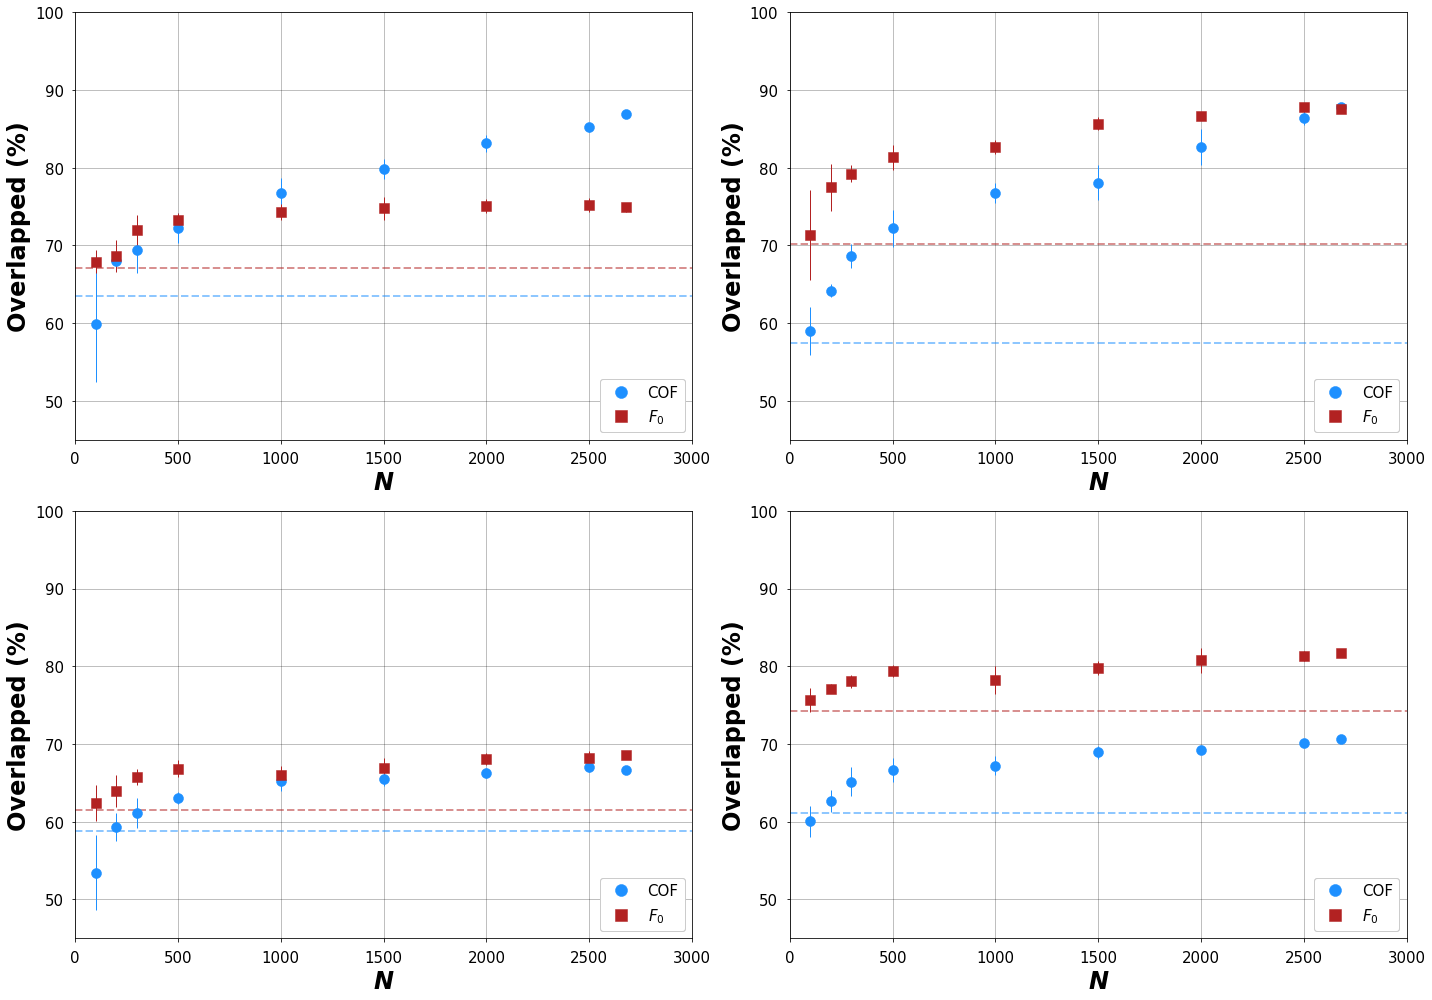

In [24]:

n = 0.2

fig1, ax = plt.subplots(2, 2, figsize=(20, 14))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['s', '--', 'indigo']}

for target in ['COF', 'intercept']:
    ax[0, 0].errorbar(x=plot_data[f'top_{n}_5050']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_5050']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_5050']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 0].errorbar(x=plot_data[f'top_{n}_2575']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_2575']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_2575']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 0].axhline(plot_data[f'top_{n}_5050']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 0].axhline(plot_data[f'top_{n}_2575']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    ax[0, 1].errorbar(x=plot_data[f'bot_{n}_5050']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'bot_{n}_5050']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'bot_{n}_5050']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 1].errorbar(x=plot_data[f'bot_{n}_2575']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'bot_{n}_2575']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'bot_{n}_2575']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 1].axhline(plot_data[f'bot_{n}_5050']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 1].axhline(plot_data[f'bot_{n}_2575']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    
#ax.legend()
'''
ax[0, 0].set_ylim(50, 100)
ax[0, 0].set_xlim(0, 3000)
ax[1, 0].set_ylim(50, 100)
ax[1, 0].set_xlim(0, 3000)

ax[0, 0].set_xlabel('N', style='italic')
ax[0, 0].set_ylabel('Overlapped (%)')
ax[1, 0].set_xlabel('N', style='italic')
ax[1, 0].set_ylabel('Overlapped (%)')


ax[0, 1].set_ylim(50, 100)
ax[0, 1].set_xlim(0, 3000)
ax[1, 1].set_ylim(50, 100)
ax[1, 1].set_xlim(0, 3000)

ax[0, 1].set_xlabel('N', style='italic')
ax[0, 1].set_ylabel('Overlapped (%)')
ax[1, 1].set_xlabel('N', style='italic')
ax[1, 1].set_ylabel('Overlapped (%)')
'''
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
                   Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]

for i in [0, 1]:
    for j in [0, 1]:
        legend = ax[i, j].legend(handles=leg1_ele, loc=4)# title='Properties')
        ax[i, j].set_ylim(45, 100)
        ax[i, j].set_xlim(0, 3000)
        ax[i, j].set_xlabel('N', style='italic')
        ax[i, j].set_ylabel('Overlapped (%)')
        ax[i, j].add_artist(legend)

plt.savefig(fname=f'./plots/top_and_bot/overlap_{n}_tm_m50_v2.pdf', dpi=500, bbox_inches='tight')


plt.show()
plt.close()

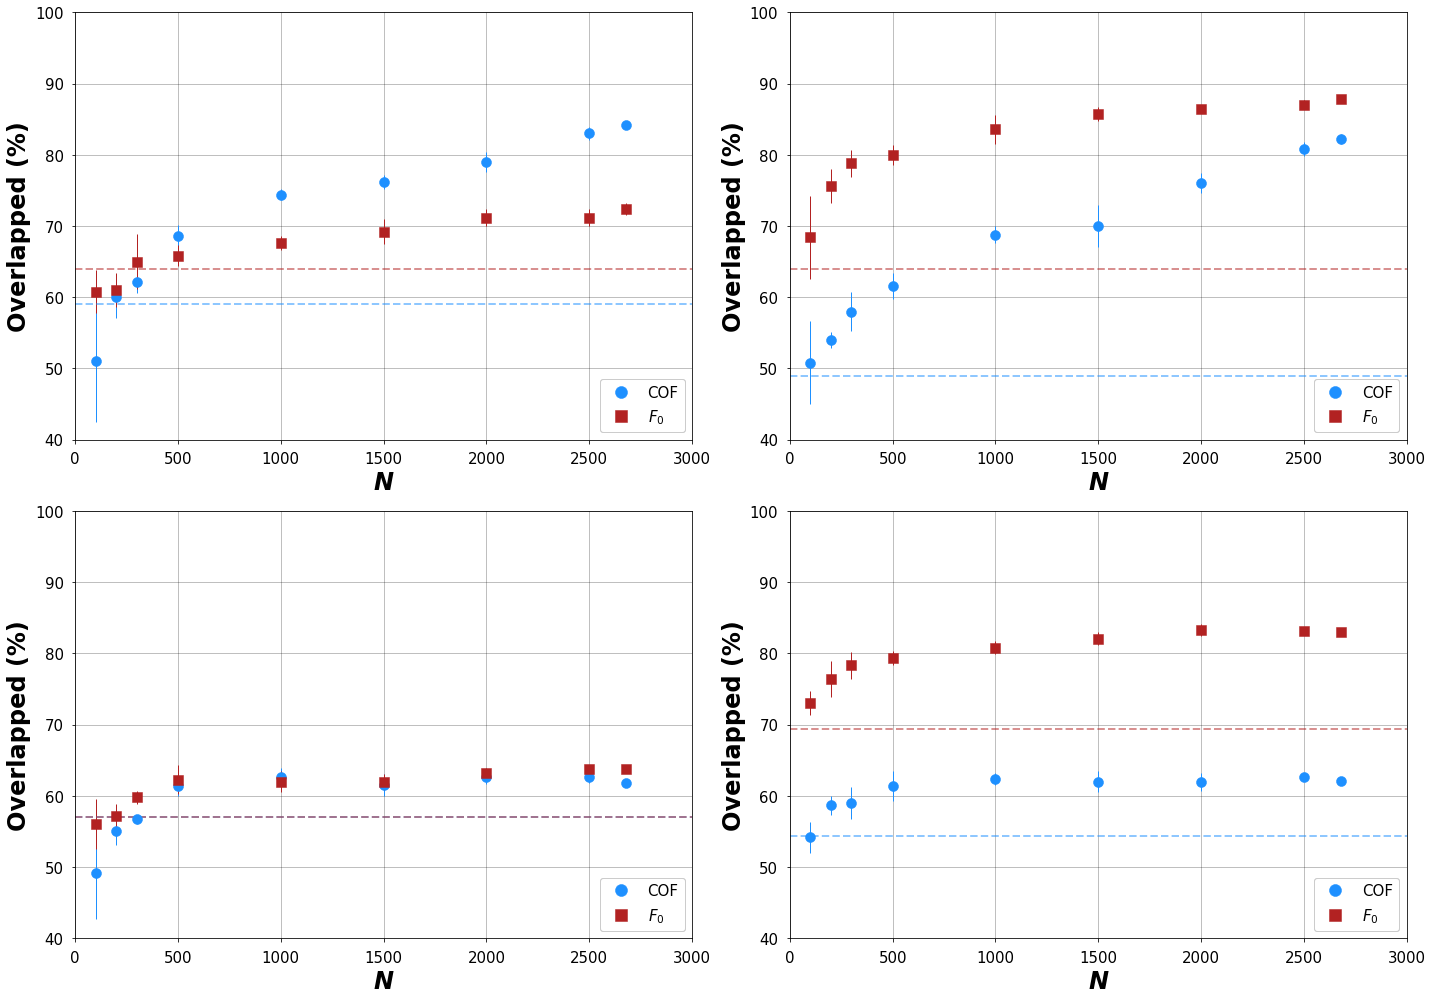

In [25]:

n = 0.15

fig1, ax = plt.subplots(2, 2, figsize=(20, 14))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['s', '--', 'indigo']}

for target in ['COF', 'intercept']:
    ax[0, 0].errorbar(x=plot_data[f'top_{n}_5050']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_5050']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_5050']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 0].errorbar(x=plot_data[f'top_{n}_2575']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_2575']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_2575']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 0].axhline(plot_data[f'top_{n}_5050']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 0].axhline(plot_data[f'top_{n}_2575']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    ax[0, 1].errorbar(x=plot_data[f'bot_{n}_5050']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'bot_{n}_5050']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'bot_{n}_5050']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 1].errorbar(x=plot_data[f'bot_{n}_2575']['m50']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'bot_{n}_2575']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'bot_{n}_2575']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 1].axhline(plot_data[f'bot_{n}_5050']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 1].axhline(plot_data[f'bot_{n}_2575']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    
#ax.legend()
'''
ax[0, 0].set_ylim(50, 100)
ax[0, 0].set_xlim(0, 3000)
ax[1, 0].set_ylim(50, 100)
ax[1, 0].set_xlim(0, 3000)

ax[0, 0].set_xlabel('N', style='italic')
ax[0, 0].set_ylabel('Overlapped (%)')
ax[1, 0].set_xlabel('N', style='italic')
ax[1, 0].set_ylabel('Overlapped (%)')


ax[0, 1].set_ylim(50, 100)
ax[0, 1].set_xlim(0, 3000)
ax[1, 1].set_ylim(50, 100)
ax[1, 1].set_xlim(0, 3000)

ax[0, 1].set_xlabel('N', style='italic')
ax[0, 1].set_ylabel('Overlapped (%)')
ax[1, 1].set_xlabel('N', style='italic')
ax[1, 1].set_ylabel('Overlapped (%)')
'''
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
                   Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]

for i in [0, 1]:
    for j in [0, 1]:
        legend = ax[i, j].legend(handles=leg1_ele, loc=4)# title='Properties')
        ax[i, j].set_ylim(40, 100)
        ax[i, j].set_xlim(0, 3000)
        ax[i, j].set_xlabel('N', style='italic')
        ax[i, j].set_ylabel('Overlapped (%)')
        ax[i, j].add_artist(legend)

plt.savefig(fname=f'./plots/top_and_bot/overlap_{n}_tm_m50_v2.pdf', dpi=500, bbox_inches='tight')


plt.show()
plt.close()

# Top 20% and 15% of 5050-test predicted by m50 amd eve models

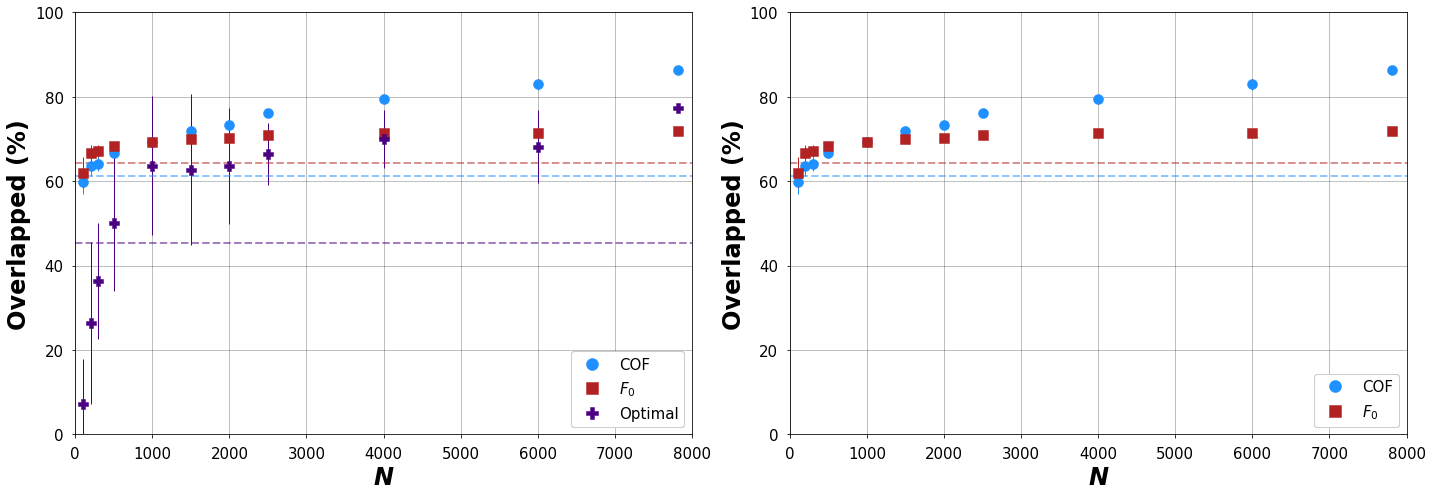

In [26]:
# Figure 1: Top 20% of t5050 with predicted by m50 and eve models 

n = 0.2

fig1, ax = plt.subplots(1, 2, figsize=(20, 7))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['P', '--', 'indigo']}

for target in ['COF', 'intercept', 'opt']:
    ax[0].errorbar(x=plot_data[f'top_{n}_everything']['eve']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[0].axhline(plot_data[f'top_{n}_everything']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    if target != 'opt':
        ax[1].errorbar(x=plot_data[f'bot_{n}_everything']['eve']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

        ax[1].axhline(plot_data[f'top_{n}_everything']['og'][target],
                    linestyle=markers[target][1],
                    linewidth=2,
                    color=markers[target][2],
                    alpha=alpha)

ax[0].set_xlabel('N', style='italic')
ax[0].set_ylabel('Overlapped (%)')
ax[1].set_xlabel('N', style='italic')
ax[1].set_ylabel('Overlapped (%)')

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[0].set_xlim(0, 8000)
ax[1].set_xlim(0, 8000)

leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
            Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$'),
            Line2D([0], [0], color='indigo', marker='P', markersize=12, linestyle='', label='Optimal')]
leg2_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
            Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]                         

legend1a = ax[0].legend(handles=leg1_ele, loc=4)#, title='Properties')
ax[0].add_artist(legend1a)

legend1b = ax[1].legend(handles=leg2_ele, loc=4)#, title='Properties')
ax[1].add_artist(legend1b)

plt.savefig(fname=f'./plots/top_and_bot/overlap_{n}_teve_eve.pdf', dpi=500, bbox_inches='tight')


plt.show()

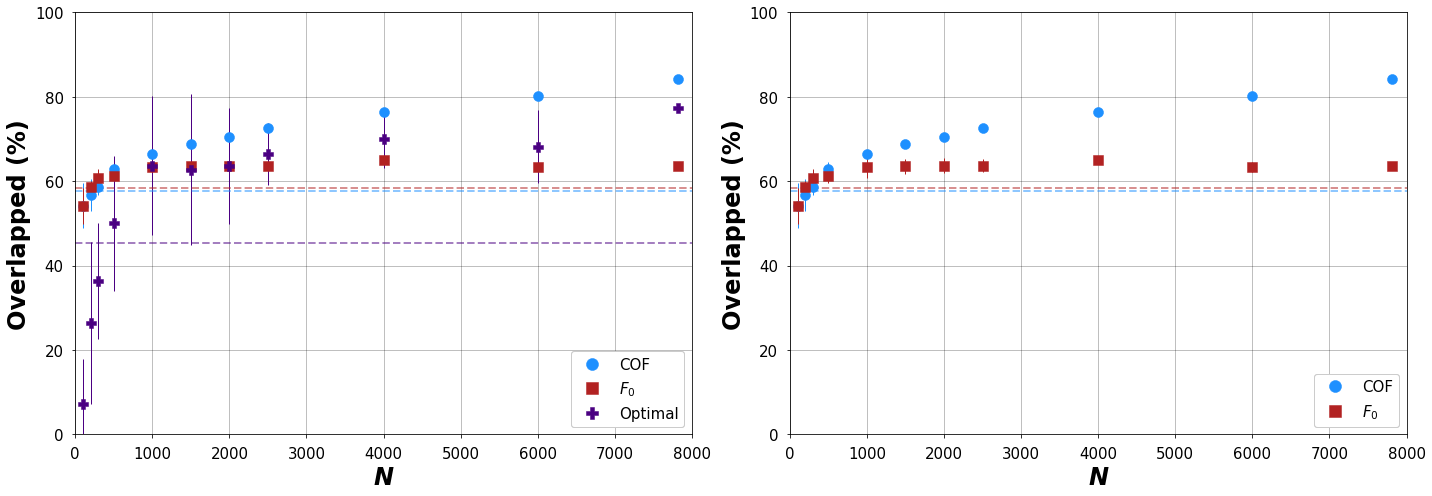

In [27]:
# Figure 1: Top 20% of t5050 with predicted by m50 and eve models 

n = 0.15

fig1, ax = plt.subplots(1, 2, figsize=(20, 7))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['P', '--', 'indigo']}

for target in ['COF', 'intercept', 'opt']:
    ax[0].errorbar(x=plot_data[f'top_{n}_everything']['eve']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[0].axhline(plot_data[f'top_{n}_everything']['og'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    if target != 'opt':
        ax[1].errorbar(x=plot_data[f'bot_{n}_everything']['eve']['point'], 
                      y=[np.mean(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data[f'top_{n}_everything']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

        ax[1].axhline(plot_data[f'top_{n}_everything']['og'][target],
                    linestyle=markers[target][1],
                    linewidth=2,
                    color=markers[target][2],
                    alpha=alpha)

ax[0].set_xlabel('N', style='italic')
ax[0].set_ylabel('Overlapped (%)')
ax[1].set_xlabel('N', style='italic')
ax[1].set_ylabel('Overlapped (%)')

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[0].set_xlim(0, 8000)
ax[1].set_xlim(0, 8000)

leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
            Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$'),
            Line2D([0], [0], color='indigo', marker='P', markersize=12, linestyle='', label='Optimal')]
leg2_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
            Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]                         

legend1a = ax[0].legend(handles=leg1_ele, loc=4)#, title='Properties')
ax[0].add_artist(legend1a)

legend1b = ax[1].legend(handles=leg2_ele, loc=4)#, title='Properties')
ax[1].add_artist(legend1b)

plt.savefig(fname=f'./plots/top_and_bot/overlap_{n}_teve_eve.pdf', dpi=500, bbox_inches='tight')


plt.show()

In [69]:
print(plot_data['top_0.15_2575']['m50']['point'])
print(list(round(np.mean(vals),4) for vals in plot_data['top_0.15_2575']['m50']['COF']))
print(list(round(np.std(vals),4) for vals in plot_data['top_0.15_2575']['m50']['COF']))
print()
print(list(round(np.mean(vals), 4) for vals in plot_data['top_0.15_2575']['m50']['intercept']))
print(list(round(np.std(vals), 4) for vals in plot_data['top_0.15_2575']['m50']['intercept']))


[100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
[49.1192, 55.1295, 56.6839, 61.3472, 62.5907, 61.5544, 62.6943, 62.6943, 61.8653]
[6.3492, 2.0359, 0.6218, 1.3351, 1.3669, 1.5159, 1.0868, 0.867, 0.4145]

[56.0622, 57.2021, 59.7927, 62.2798, 61.9689, 61.9689, 63.2124, 63.7306, 63.8342]
[3.4587, 1.6253, 0.9034, 2.0307, 1.4873, 1.1161, 0.7328, 0.5676, 0.3877]


In [68]:
print(plot_data['top_0.15_2575']['m50']['point'])
print(list(np.mean(vals) for vals in plot_data['bot_0.15_2575']['m50']['COF']))
print(list(round(np.std(vals),4) for vals in plot_data['bot_0.15_2575']['m50']['COF']))
print()
print(list(np.mean(vals) for vals in plot_data['bot_0.15_2575']['m50']['intercept']))
print(list(round(np.std(vals), 4) for vals in plot_data['bot_0.15_2575']['m50']['intercept']))


[100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
[54.196891191709845, 58.65284974093264, 58.96373056994819, 61.34715025906736, 62.38341968911917, 61.968911917098445, 61.968911917098445, 62.69430051813472, 62.07253886010362]
[2.1885, 1.286, 2.2561, 2.088, 0.8419, 1.4873, 1.2521, 0.3277, 0.2073]

[73.05699481865284, 76.37305699481865, 78.34196891191709, 79.37823834196891, 80.82901554404145, 82.07253886010363, 83.3160621761658, 83.21243523316062, 83.00518134715027]
[1.6709, 2.5085, 1.922, 1.0047, 0.867, 0.9034, 0.829, 0.5284, 0.2073]


In [70]:
print(plot_data['top_0.15_everything']['eve']['point'])
print(list(round(np.mean(vals),4) for vals in plot_data['top_0.15_everything']['eve']['COF']))
print(list(round(np.std(vals),4) for vals in plot_data['top_0.15_everything']['eve']['COF']))
print()
print(list(round(np.mean(vals), 4) for vals in plot_data['top_0.15_everything']['eve']['intercept']))
print(list(round(np.std(vals), 4) for vals in plot_data['top_0.15_everything']['eve']['intercept']))


[100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7816]
[54.198, 56.7235, 58.6348, 62.8669, 66.4846, 68.8737, 70.3754, 72.4915, 76.4505, 80.1365, 84.1638]
[5.3548, 3.8998, 1.9355, 1.5625, 0.9259, 0.3344, 0.7288, 0.273, 0.6476, 0.6618, 0.273]

[54.198, 58.6348, 60.7509, 61.2287, 63.3447, 63.4812, 63.686, 63.686, 64.9147, 63.3447, 63.6177]
[4.2759, 1.5171, 2.2119, 1.5803, 2.5043, 1.78, 1.8644, 1.4735, 0.7902, 1.0922, 0.3481]


In [72]:
print(plot_data['top_0.15_everything']['eve']['point'])
print(list(round(np.mean(vals),4) for vals in plot_data['bot_0.15_everything']['eve']['COF']))
print(list(round(np.std(vals),4) for vals in plot_data['bot_0.15_everything']['eve']['COF']))
print()
print(list(round(np.mean(vals),4) for vals in plot_data['bot_0.15_everything']['eve']['intercept']))
print(list(round(np.std(vals), 4) for vals in plot_data['bot_0.15_everything']['eve']['intercept']))


[100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7816]
[52.0137, 55.2901, 56.5188, 59.8635, 62.7304, 64.7099, 65.5973, 69.4198, 72.901, 76.8601, 80.6826]
[2.7355, 1.4155, 2.7012, 2.6313, 1.8111, 0.8795, 0.6618, 1.4892, 1.4253, 1.0216, 0.273]

[69.0102, 73.9249, 77.6792, 80.8191, 82.7304, 84.8464, 85.6655, 86.7577, 87.372, 88.3276, 88.7372]
[1.6354, 1.8644, 1.9137, 1.1091, 1.9015, 0.7028, 0.5711, 0.7288, 0.6826, 0.7902, 0.2159]


In [73]:
print(plot_data['top_0.15_everything']['eve']['point'])
print(list(round(np.mean(vals),4) for vals in plot_data['top_0.15_everything']['eve']['opt']))
print(list(round(np.std(vals),4) for vals in plot_data['top_0.15_everything']['eve']['opt']))



[100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7816]
[7.2727, 26.3636, 36.3636, 50.0, 63.6364, 62.7273, 63.6364, 66.3636, 70.0, 68.1818, 77.2727]
[10.6017, 19.1557, 13.787, 16.0062, 16.5145, 17.8145, 13.787, 7.3855, 6.803, 8.6244, 0.0]


In [79]:
3/22

0.13636363636363635